<a href="https://colab.research.google.com/github/gurubalavignesh/Python-Case-Study/blob/main/Guru_Bala_Vignesh_Aerofit_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **About Aerofit**
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

### **Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

- Perform descriptive analytics **to create a customer profile** for each AeroFit treadmill product by developing appropriate tables and charts.
- For each AeroFit treadmill product, construct **two-way contingency tables** and compute all **conditional and marginal probabilities** along with their insights/impact on the business.

## **1. Problem Statement**

- Analysing basic metrics.
- Non-Graphical Analysis.
- Missing value & Outlier detection.
- Visual Analysis - Univariate, Bivariate & Correlation
- Contigency Table - Marginal & Conditional Probablities
- Customer profiling

## **Content of the Analysis**

- Reading data & checking for various metrics(Shape, info, count).
- Preprocessing of data.
- Detection of missing values.
- Non-Graphical Analysis.
- Outlier detection using IQR and Boxplot.
- Visualisation for each product analysis based on different attributes.
- Correlation among various attributes.
- Contigency Table - Marginal & Conditional Probablities.
- Customer profiling for each duct.


## **2. Importing Libraries and Loading Data**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as s

In [6]:
df = pd.read_csv('aerofit_treadmill.csv')

In [7]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## **3. Analysing basic metrics**

In [8]:
df.shape

(180, 9)

In [9]:
# Datatype of each Column
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [10]:
# Column names
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

## **Column Details**
- Product Purchased:	KP281, KP481, or KP781
- Age:	In years
- Gender:	Male/Female
- Education:	In years
- MaritalStatus:	Single or partnered
- Usage:	The average number of times the customer plans to use the treadmill each week.
- Income:	Annual income (in $)
- Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles:	The average number of miles the customer expects to walk/run each week

In [11]:
# Information of the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [12]:
# Count of nulls in each column

df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [13]:
# Basic numerical Statistics of dataset using describe()
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [14]:
# unique products
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

### **Observations under basic statistics**:

- Dataset contains 180 rows and 9 Columns.
- There are no missing values in the data.
- There are 3 unique products in the dataset(namely 'KP281', 'KP481', 'KP781')
- **KP281** is the most frequent product.
- Minimum & Maximum age of the person is 18 & 50, mean age is 28.79 ,median age is 26 and 75% of persons have age less than or equal to 33.
- Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.
- Out of 180 data points, 104's gender is Male and rest are the female(via frequency)
- Standard deviation for **Income** & **Miles** is very high. These variables might have the outliers in it.

## **4. Non-Graphical Analysis**

In [15]:
# Number of customers for each products
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [16]:
# Number of customers for each age
df['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [17]:
# Number of customers in each gender
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [18]:
# Number of customers with years of education.
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [19]:
# Count of customers based on  MaritalStaus
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [20]:
# Number of customers based on the usage of the treadmill .
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [21]:
# Count of customers based on the fitness category.
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

### **Observations under Non-Graphical Analysis**:

- There are 3 unique products in the dataset(namely 'KP281', 'KP481', 'KP781')
- **KP281** is the most frequent product with 80 No's of Customers.
- Maximum number of customers(25 No's) with age 25.
- Most of the people are having 16 years of education with 85 Customers.
- Male customers are the maximum with 104 No's and Female customers are with 76.
- When compared to marital status customers who are married are high in usage when compared to single.
- Maximum average usage of the treadmill is around 3 times a week.
- Based on fitness categorey , customers with rated 3 has the maximum number of users when compared to other levels.

In [22]:
# Statistical Summary based on each product

KP281 = df[df['Product'] == 'KP281']
KP481 = df[df['Product'] == 'KP481']
KP781 = df[df['Product'] == 'KP781']

In [23]:
# Statistical Summary of the attributes for product KP281
KP281.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


In [24]:
# Statistical Summary of the attributes for product KP481
KP481.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


In [25]:
# Statistical Summary of the attributes for product KP781
KP781.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


## 5. **Missing value & Outlier detection**

In [26]:
# Count of nulls in each column

df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [27]:
# Outliers for 'Age' attribute using iqr method

q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
df[(df['Age']<q1-1.5*iqr) | (df['Age']>q3+1.5*iqr)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [28]:
# Outliers for 'Education' attribute using iqr method

q1 = df['Education'].quantile(0.25)
q3 = df['Education'].quantile(0.75)
iqr = q3 - q1
df[(df['Education']<q1-1.5*iqr) | (df['Education']>q3+1.5*iqr)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


In [29]:
# Outliers for 'Usage' attribute using iqr method

q1 = df['Usage'].quantile(0.25)
q3 = df['Usage'].quantile(0.75)
iqr = q3 - q1
df[(df['Usage']<q1-1.5*iqr) | (df['Usage']>q3+1.5*iqr)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200


In [30]:
# Outliers for 'Fitness' attribute using iqr method

q1 = df['Fitness'].quantile(0.25)
q3 = df['Fitness'].quantile(0.75)
iqr = q3 - q1
df[(df['Fitness']<q1-1.5*iqr) | (df['Fitness']>q3+1.5*iqr)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,KP281,23,Male,16,Partnered,3,1,38658,47
117,KP481,31,Female,18,Single,2,1,65220,21


In [31]:
# Outliers for 'Income' attribute using iqr method

q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1
df[(df['Income']<q1-1.5*iqr) | (df['Income']>q3+1.5*iqr)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


In [32]:
# Outliers for 'Income' attribute using iqr method

q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1
df[(df['Income']<q1-1.5*iqr) | (df['Income']>q3+1.5*iqr)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


In [33]:
# Boxplot to showcase the outliers , 50% of data and median of each attributes

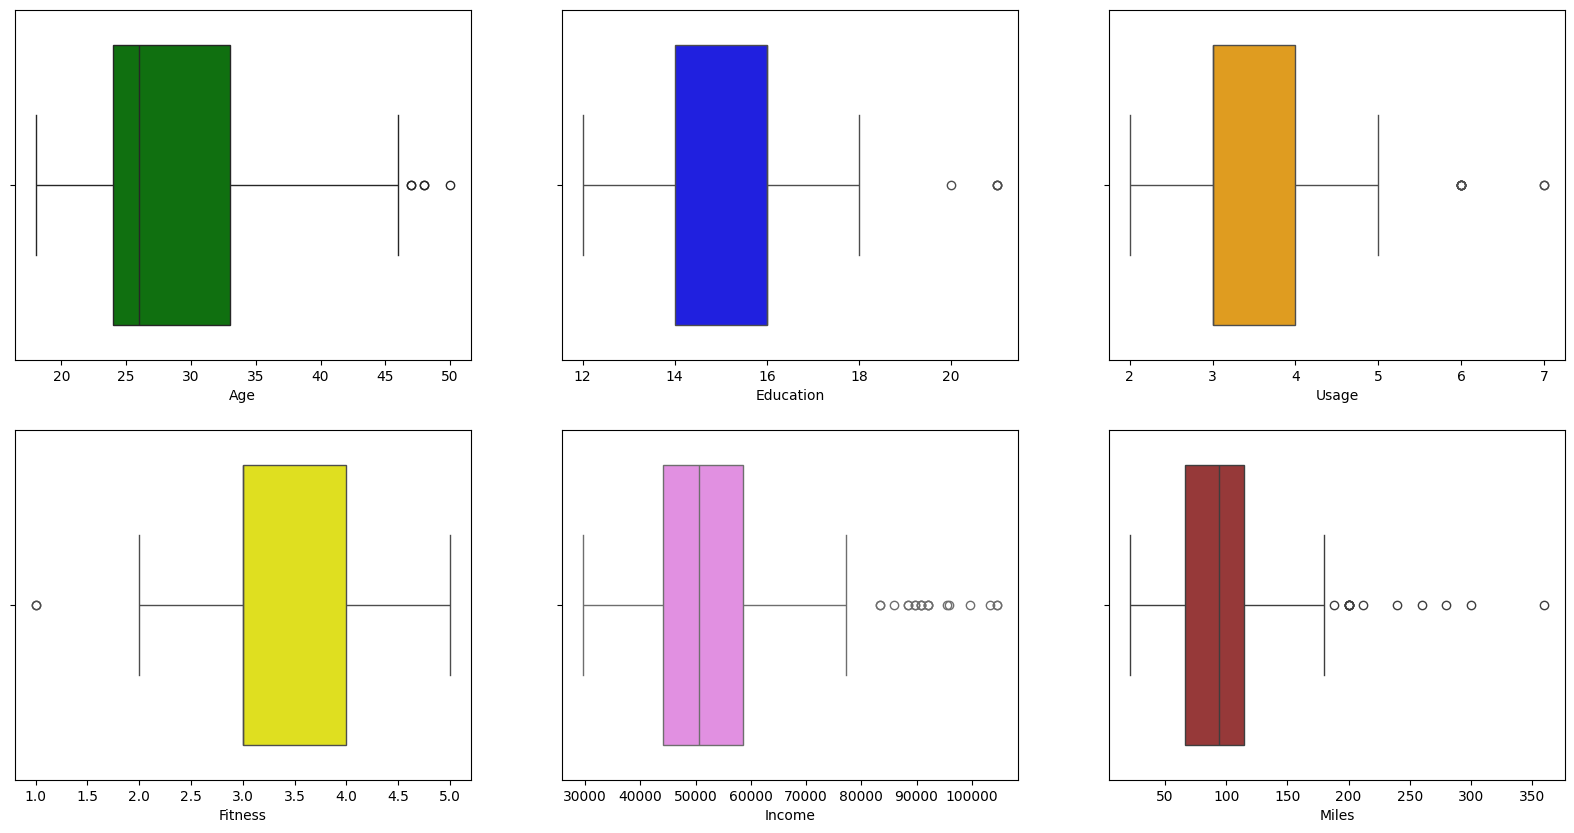

In [34]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(data=df,x='Age',color = 'green')
plt.subplot(2,3,2)
sns.boxplot(data=df,x='Education' ,color = 'blue')
plt.subplot(2,3,3)
sns.boxplot(data=df,x='Usage',color = 'orange')
plt.subplot(2,3,4)
sns.boxplot(data=df,x='Fitness',color = 'yellow')
plt.subplot(2,3,5)
sns.boxplot(data=df,x='Income',color = 'violet')
plt.subplot(2,3,6)
sns.boxplot(data=df,x='Miles',color ='brown')
plt.show()

 **Observation** :
- There are few outliers in each attributes & outliers of each attributes are found out.
- 50% of customers have 14-16 years of education.
- They use the product for 3-4 times in a week.
- Median income of customers using the product is 50000 dollars.

# **6. Visual Analysis - Univariate, Bivariate & Correlation**

In [35]:
# Countplot --> No. of customers for each product

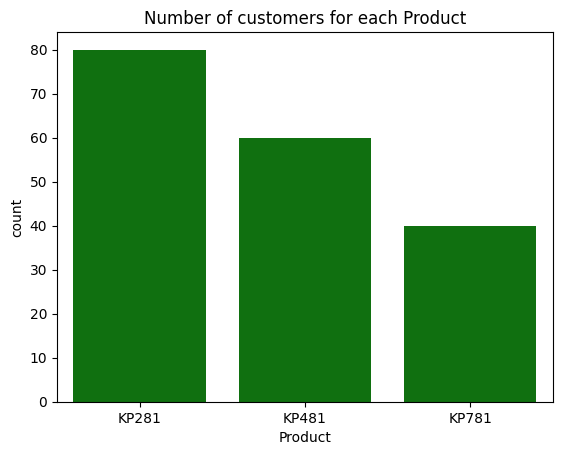

In [36]:
sns.countplot(data=df,x='Product',color='green')
plt.title('Number of customers for each Product')
plt.show()

- *Maximum customers usage are in product KP281 *

In [37]:
# Countplot for distribution of users for each product based on gender

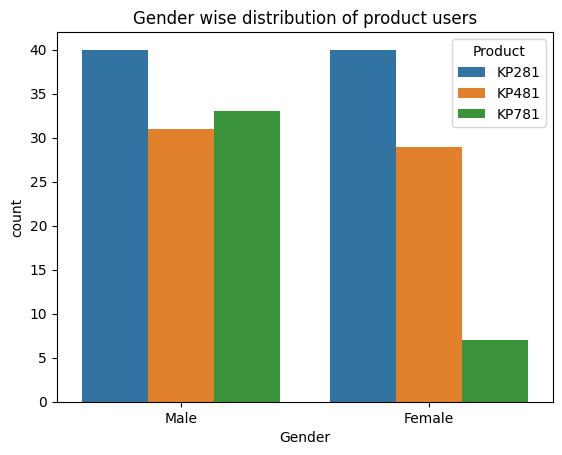

In [38]:
sns.countplot(data=df,x='Gender',hue='Product')
plt.title('Gender wise distribution of product users')
plt.show()

- **Observation** :
    - For the basic product(KP281), number of male and female customers are same(around 40).
    - For intermediate(KP481) and advanced(KP781) product, number of male customers are more when compared to females.

In [39]:
# Countplot for distribution of users for each product based on marital status

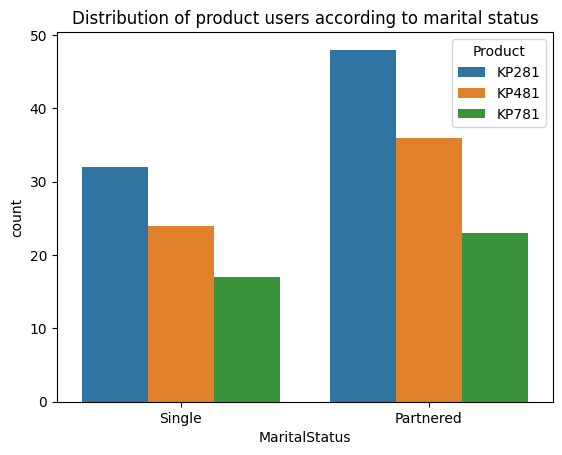

In [40]:
sns.countplot(data=df,x='MaritalStatus',hue='Product')
plt.title('Distribution of product users according to marital status')
plt.show()

- **Observation** :
    - Married customers are more than single customers for each products.

In [41]:
# Countplot for distribution of users as per their product usage per week.

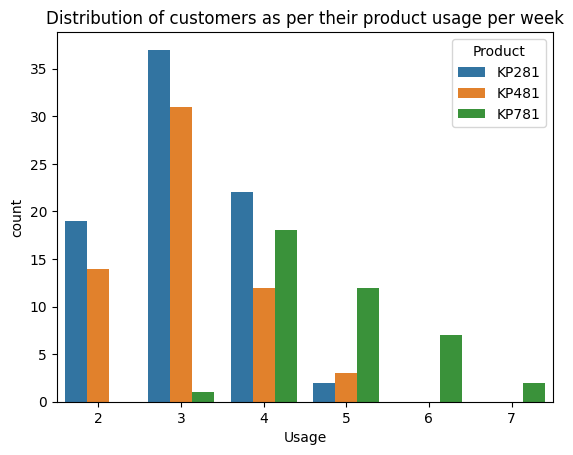

In [42]:
sns.countplot(data=df,x='Usage',hue='Product')
plt.title("Distribution of customers as per their product usage per week")
plt.show()

- **Observation** :
    - More number of customers use the product 3 times a week and they prefer the basic(KP281) and intermediate(KP481) product.
    - Customers using the product for 5 or more times usually prefer the advanced(KP781) product.

In [43]:
# Box plot showcasing Age-wise distribution of each product

In [44]:
df.groupby('Product')['Age'].value_counts()

Product  Age
KP281    23     8
         25     7
         26     7
         28     6
         24     5
               ..
KP781    40     1
         42     1
         45     1
         47     1
         48     1
Name: Age, Length: 68, dtype: int64

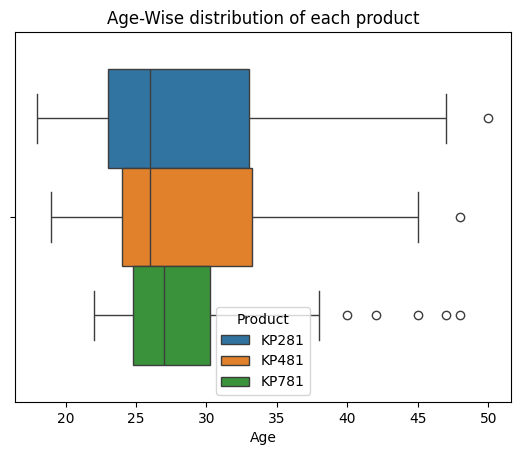

In [45]:
sns.boxplot(data =df,x ='Age',hue='Product')
plt.title('Age-Wise distribution of each product')
plt.show()

- **Observation** :
    - Median age for the basic and intermediate level product users is less than the median age of advanced level product.

In [46]:
# countplot for Distribution of customers for each product as per their fitness

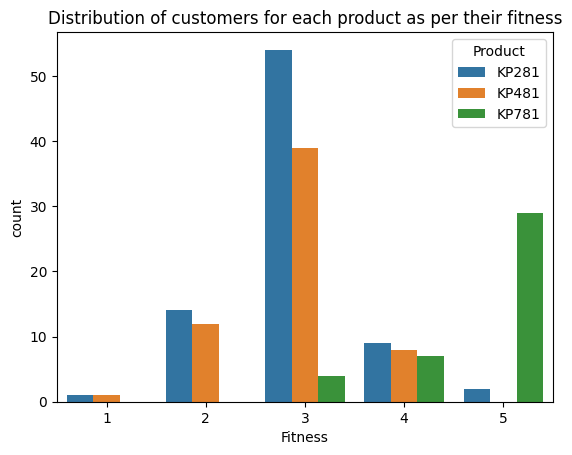

In [47]:
sns.countplot(data= df,x='Fitness',hue='Product')
plt.title('Distribution of customers for each product as per their fitness')
plt.show()

- **Observation** :
    - We can see for people having low rating on fitness mostly prefer basic and intermediate product.
    - People having higher level of fitness prefer the advanced product.

In [48]:
# Scatterplot for distribution of each product user by their income

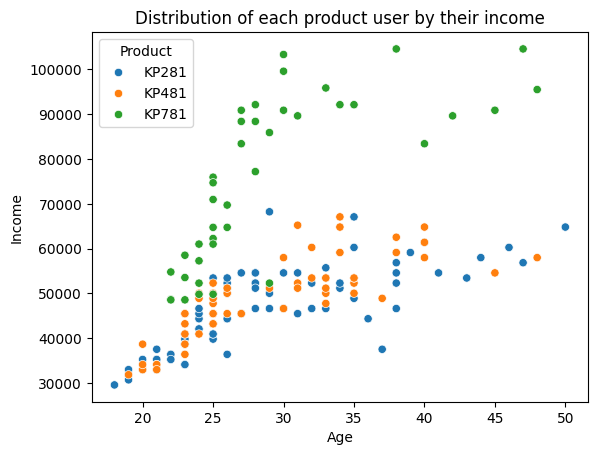

In [49]:
sns.scatterplot(data=df,x='Age',y='Income',hue='Product')
plt.title('Distribution of each product user by their income')
plt.show()

- **Observation** :
    - People having higher income mostly prefer the advance level(KP781) of the product.
    - People with moderate income prefer basic(KP281) & intermediate(KP481) product.

In [50]:
# kde plot for the distribution of customers for each product according to the number of miles they ran/walk.

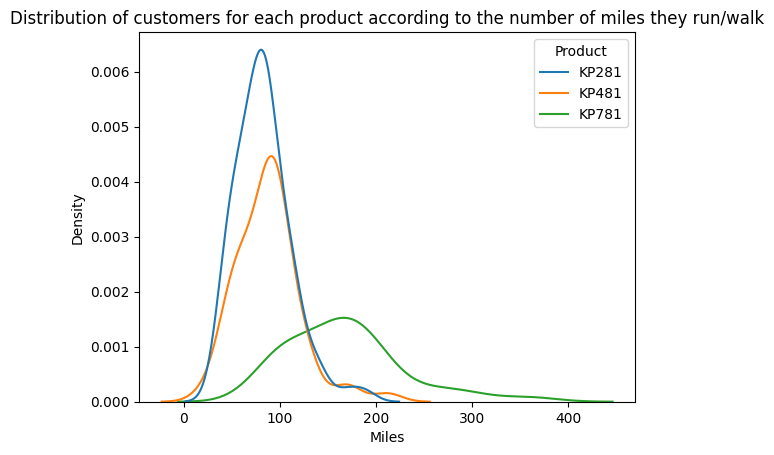

In [51]:
sns.kdeplot(data=df,x='Miles',hue='Product')
plt.title('Distribution of customers for each product according to the number of miles they run/walk')
plt.show()

- **Observation** :
    - Basic level product (KP281) has the highest density .
    - Advanced level product(KP781) has the max. miles.
    - Or in otherwords as the advancement of product increases the number of miles ran/walked  by customers increases

# **Understanding the distribution of the data for the quantitative attributes:**
- Age
- Education
- Usage
- Fitness
- Income
- Miles

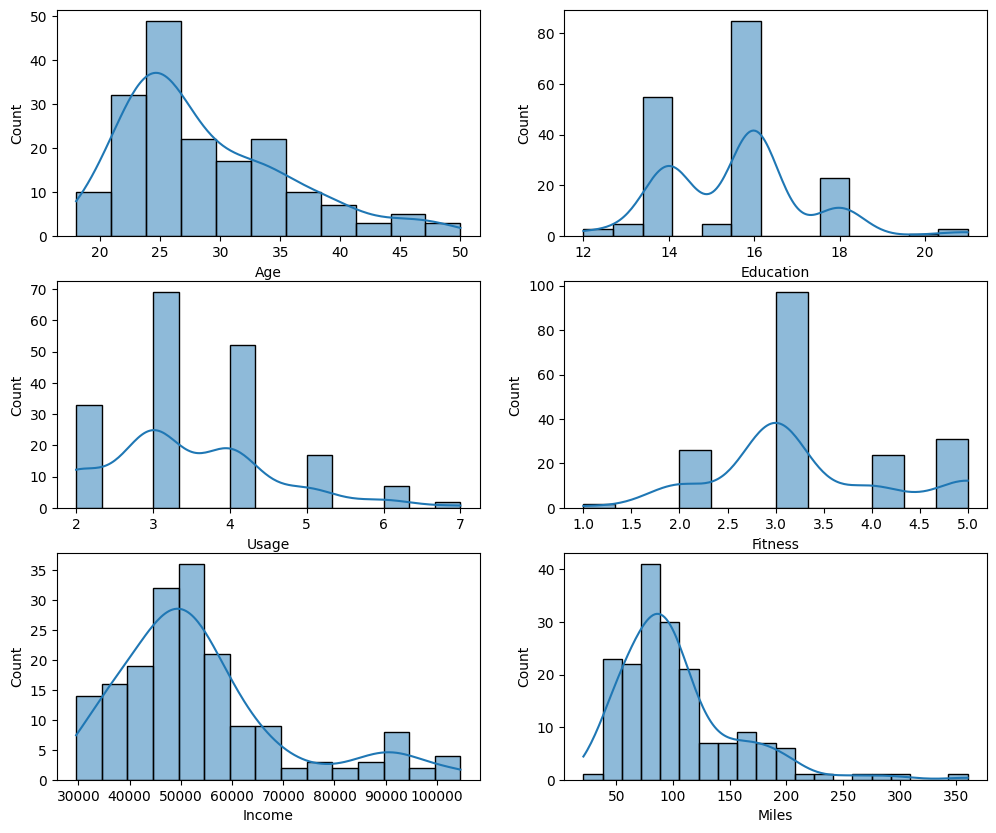

In [52]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))


sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

# **7. Correlation among various attributes.**

In [53]:
# Basic Co-relation

df.corr()

<ipython-input-53-55cdbe9cd758>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [54]:
# Heat Map for show casing the correlation between different numerical attributes.

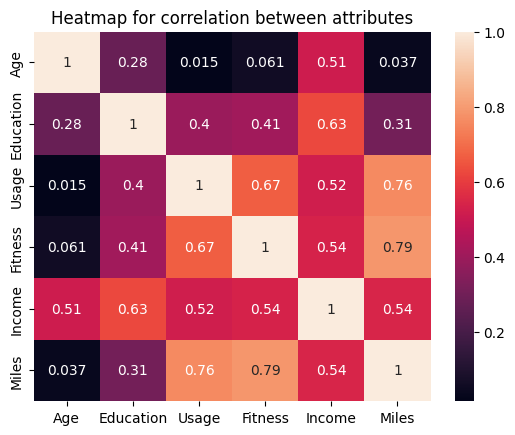

In [55]:
sns.heatmap(data=df.corr(numeric_only=True),annot=True)
plt.title('Heatmap for correlation between attributes')
plt.show()

- Fitness & number of miles ran/walked is most positively co-related(0.79)
- Age & Usage is most negatively co-related(0.015)

In [56]:
# Co-relation based on the product KP281

In [57]:
KP281.corr()

<ipython-input-57-641dd584066e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  KP281.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.336268,-0.015342,0.054469,0.751831,-0.064632
Education,0.336268,1.000000,0.169369,0.111379,0.446551,0.111956
Usage,-0.015342,0.169369,1.000000,0.468825,-0.052227,0.645576
Fitness,0.054469,0.111379,0.468825,1.000000,0.005906,0.826177
Income,0.751831,0.446551,-0.052227,0.005906,1.000000,-0.039377
Miles,-0.064632,0.111956,0.645576,0.826177,-0.039377,1.000000


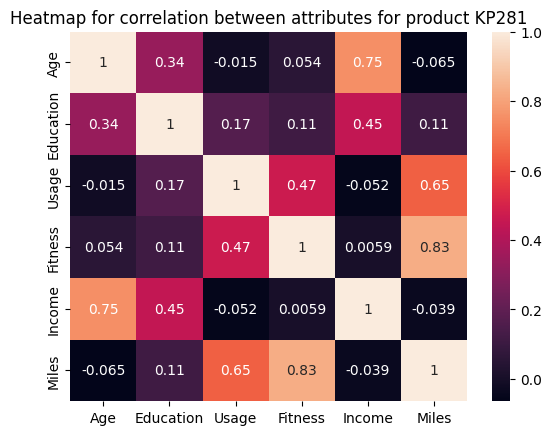

In [58]:
sns.heatmap(data=KP281.corr(numeric_only=True),annot=True)
plt.title('Heatmap for correlation between attributes for product KP281')
plt.show()

**Observation:**
- Fitness & number of miles ran/walked is most positively correlated.
- Age & number of miles is most negatively co-related.

In [59]:
# Co-relation based on the product KP481

In [60]:
KP481.corr()

<ipython-input-60-5163cc8c3e81>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  KP481.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.472956,-0.078458,-0.026730,0.787550,-0.124710
Education,0.472956,1.000000,-0.112105,-0.094660,0.540207,-0.240293
Usage,-0.078458,-0.112105,1.000000,0.349996,0.073367,0.673648
Fitness,-0.026730,-0.094660,0.349996,1.000000,-0.008086,0.676894
Income,0.787550,0.540207,0.073367,-0.008086,1.000000,-0.054691
Miles,-0.124710,-0.240293,0.673648,0.676894,-0.054691,1.000000


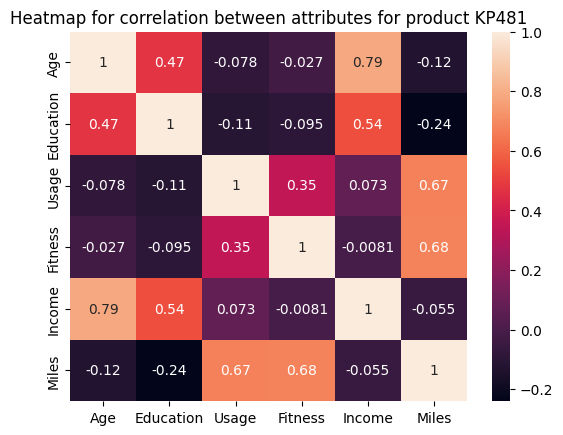

In [61]:
sns.heatmap(data=KP481.corr(numeric_only=True),annot=True)
plt.title('Heatmap for correlation between attributes for product KP481')
plt.show()

**Observation** :
- Income &  age is most positively correlated for this product customers.
- Miles ran/walked & numbers of years of education is most negatively co-related.

In [62]:
# Co-relation based on the product KP781

In [63]:
KP781.corr()

<ipython-input-63-8107bf8fc9a8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  KP781.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.167617,0.120007,0.212141,0.713489,0.243106
Education,0.167617,1.000000,-0.017758,-0.166991,0.252306,-0.228587
Usage,0.120007,-0.017758,1.000000,0.228182,0.281543,0.503106
Fitness,0.212141,-0.166991,0.228182,1.000000,0.110507,0.391083
Income,0.713489,0.252306,0.281543,0.110507,1.000000,0.309289
Miles,0.243106,-0.228587,0.503106,0.391083,0.309289,1.000000


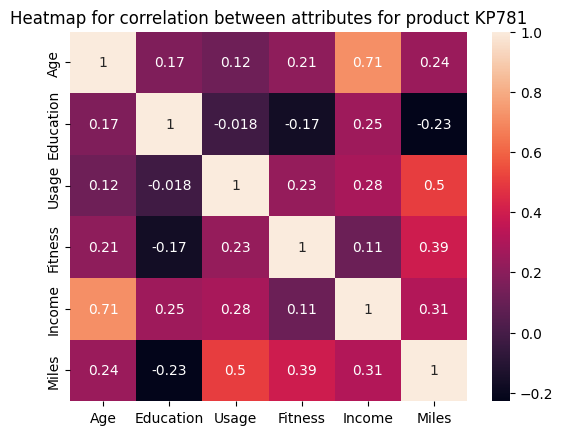

In [64]:
sns.heatmap(data=KP781.corr(numeric_only=True),annot=True)
plt.title('Heatmap for correlation between attributes for product KP781')
plt.show()

**Observation:**
- Income &  age is most positively correlated for this product customers.
- Miles ran/walked & numbers of years of education is most negatively co-related.

# **8. Contigency Table - Marginal & Conditional Probablities.**

# **Marginal Probability**

In [65]:
# Probability of customer for different product using crosstab

In [66]:
pd.crosstab(df['Product'],'No_of_customers',normalize=True)

col_0,No_of_customers
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


**Observations:**
- 44.44% of Customers using KP281 product.
- 33.33% of Customers using KP481 product.
- 22.22% of Customers using KP781 product.

In [67]:
# Probability of customers for each product based on their marital status

In [68]:
pd.crosstab(df['Product'],df['MaritalStatus'],margins=True,normalize=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


**Observations:**
- Probability of partnered customers for product KP281, KP481 & KP781 are 26.67%, 20% and 12.78%.
- Probability of single customers for product KP281, KP481 & KP781 are 17.78%, 13.34% and 9.4%.

In [69]:
# Probability of customers for each product based on gender

In [72]:
pd.crosstab(df['Product'],df['Gender'],margins=True,normalize=True)

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


**Observations:**
- Probability of male customers for product KP281, KP481 & KP781 are 22.22%, 17.22 & 18.33% respectively.
- Probability of female customers for product KP281, KP481 & KP781 are 22.22%, 16.11% and 3.88% respectively.

In [73]:
# Probability of customers for each product based on number of years of education.

In [74]:
pd.crosstab(df['Product'],pd.cut(df['Education'],bins=[0,15,30],labels=['Less than or equal to 15','Greater than 15']
                                ),margins=True,normalize=True)

Education,Less than or equal to 15,Greater than 15,All
Product,,,
KP281,0.216667,0.227778,0.444444
KP481,0.150000,0.183333,0.333333
KP781,0.011111,0.211111,0.222222
All,0.377778,0.622222,1.000000


**Observations:**
- Probability of customers having 15 or less years of education for product KP281, KP481 & KP781 are 21.67%, 15% & 1.11% respectively.
- Probability of customers having greater than 15 years of education for product KP281, KP481 & KP781 are 22.78%, 18.33% & 21.11% respectively.

In [75]:
# Probability of customers based on the age category

In [79]:
pd.crosstab(df['Product'],pd.cut(df['Age'],bins=[0,20,30,40,50],labels=['<=20','20-30','30-40',
                                                                        '40-50']),margins=True,normalize=True)

Age,<=20,20-30,30-40,40-50,All
Product,,,,,
KP281,0.033333,0.272222,0.105556,0.033333,0.444444
KP481,0.022222,0.172222,0.127778,0.011111,0.333333
KP781,0.000000,0.166667,0.033333,0.022222,0.222222
All,0.055556,0.611111,0.266667,0.066667,1.000000


**Observations:**
- Probability of customers of age <=20 for product KP281, KP481 & KP781 are 3.33%, 2.22% & 0% respectively.
- Probability of customers of age >20 & <=30 for product KP281, KP481 & KP781 are 27.22%, 17.22% & 16.67% respectively.
- Probability of customers of age >30 & <=40 for product KP281, KP481 & KP781 are 10.55%, 12.78% & 3.33% respectively.
- Probability of customers of age >40 & <=50 for product KP281, KP481 & KP781 are 3.33%, 1.11% & 2.22% respectively.

In [77]:
# Probability of customers based on their income category

In [80]:
pd.crosstab(df['Product'],pd.cut(df['Income'],bins=[0,30000,50000,70000,90000,110000],labels=['<=30000',
                                                                                              '30000-50000','50000-70000','70000-90000',
                                                                                              '90000-110000']),margins=True,normalize=True)

Income,<=30000,30000-50000,50000-70000,70000-90000,90000-110000,All
Product,,,,,,
KP281,0.005556,0.261111,0.177778,0.000000,0.000000,0.444444
KP481,0.000000,0.166667,0.166667,0.000000,0.000000,0.333333
KP781,0.000000,0.027778,0.066667,0.061111,0.066667,0.222222
All,0.005556,0.455556,0.411111,0.061111,0.066667,1.000000


**Observations:**
- Probability of customers having income <= 30000 for product KP281, KP481 & KP781 are 0.5%, 0% & 0% respectively.
- Probability of customers having income >30000 & <=50000 for product KP281, KP481 & KP781 are 26.11%, 16.67% & 2.77% respectively.
- Probability of customers having income >50000 & <=70000 for product KP281, KP481 & KP781 are 17.78%, 16.67% & 6.67% respectively.
- Probability of customers having income >70000 & <=90000 for product KP281, KP481 & KP781 are 0%, 0% & 6.11% respectively.
- Probability of customers having income >90000 & <=110000 for product KP281, KP481 & KP781 are 0%, 0% & 6.67% respectively.

# **Conditional Probability**

In [81]:
# Probability of customers using different products given that gender

In [82]:
pd.crosstab(df['Product'],df['Gender'],normalize='columns',margins=True)

Gender,Female,Male,All
Product,,,
KP281,0.526316,0.384615,0.444444
KP481,0.381579,0.298077,0.333333
KP781,0.092105,0.317308,0.222222


**Observations:**
- Probability of customer using product KP281, KP481 & KP781 given that they are female is 52.63% ,38.16% and 9.2%% respectively.
- Probability of customer using product KP281, KP481 & KP781 given that they are male is 38.46% ,29.80% and 31.17% respectively.

In [83]:
# Probability of customers years of education given product

In [85]:
pd.crosstab(df['Product'],pd.cut(df['Education'],bins=[0,15,30],labels=['<= 15',
                                                                        '> 15']),margins=True,normalize='index')

Education,<= 15,> 15
Product,,
KP281,0.487500,0.512500
KP481,0.450000,0.550000
KP781,0.050000,0.950000
All,0.377778,0.622222


**Observations:**
- Probability of customer having <= 15 or > 15 years of education,  given that they are using product KP281 is 48.75% and 51.25% respectively.
- Probability of customer having <= 15 or > 15 years of education, given that they are using product KP481 is 45% and 55% respectively.
- Probability of customer having <= 15 or > 15 years of education, given that they are using product KP781 is 5% and 95% respectively.

In [86]:
# Probability of Customers using product given years of education

In [87]:
pd.crosstab(df['Product'],pd.cut(df['Education'],bins=[0,15,30],labels=['<=15',
                                                                        '> 15']),margins=True,normalize='columns')

Education,<=15,> 15,All
Product,,,
KP281,0.573529,0.366071,0.444444
KP481,0.397059,0.294643,0.333333
KP781,0.029412,0.339286,0.222222


**Observations:**
- Probability of customer using product KP281,KP481 & KP781 given that they are having <= 15 years of education is 57.35%, 39.70% & 2.94% respectively.
- Probability of customer using product KP281, KP481 & KP781 given that they are having > 15 years of education is 36.60%, 29.46% and 33.92% respectively.

In [88]:
# Probability of customers based on age category given product

In [91]:
pd.crosstab(df['Product'],pd.cut(df['Age'],bins=[0,20,30,40,50],labels=['<20','20-30','30-40',
                                                                        '40-50']),margins=True,normalize='index')

Age,<20,20-30,30-40,40-50
Product,,,,
KP281,0.075000,0.612500,0.237500,0.075000
KP481,0.066667,0.516667,0.383333,0.033333
KP781,0.000000,0.750000,0.150000,0.100000
All,0.055556,0.611111,0.266667,0.066667


**Observations:**
- Probability of customer having age [<=20, >20&<=30, >30&<=40, >40&<=50], given that they are using product KP281 is 7.5%, 61.25%, 23.75% & 7.5% respectively.
- Probability of customer having age [<=20, >20&<=30, >30&<=40, >40&<=50], given that they are using product KP481 is 6.67%, 51.67%, 38.33% & 3.33% respectively.
- Probability of customer having age [<=20, >20&<=30, >30&<=40, >40&<=50], given that they are using product KP781 is 0%, 75%, 15% & 10% respectively.

In [92]:
# Probability of Customers using product given the age category

In [94]:
pd.crosstab(df['Product'],pd.cut(df['Age'],bins=[0,20,30,40,50],labels=['<= 20','20-30',
                                                                        '30-40','40-50']),margins=True,normalize='columns')

Age,<= 20,20-30,30-40,40-50,All
Product,,,,,
KP281,0.6,0.445455,0.395833,0.500000,0.444444
KP481,0.4,0.281818,0.479167,0.166667,0.333333
KP781,0.0,0.272727,0.125000,0.333333,0.222222


**Observations:**
- Probability of customer using product KP281,KP481 & KP781 given that they are of age <= 20 are 60%, 40% & 0% respectively.
- Probability of customer using product KP281, KP481 & KP781 given that they are of age >20 & <=30 are 44.54%, 28.18% & 27.27% respectively.
- Probability of customer using product KP281, KP481 & KP781 given that they are of age >30 & <=40 are 39.58.54%, 47.91% & 12.50% respectively.
- Probability of customer using product KP281, KP481 & KP781 given that they are of age >40 & <=50 are 50%, 16.67%, 33.33% respectively.

In [95]:
# Probability of customer having income range given product

In [96]:
pd.crosstab(df['Product'],pd.cut(df['Income'],bins=[0,30000,50000,70000,90000,110000],labels=['<= 30000',
                                                                                              '30000-50000','50000-70000','70000-90000',
                                                                                              '90000-110000']),margins=True,normalize='index')

Income,<= 30000,30000-50000,50000-70000,70000-90000,90000-110000
Product,,,,,
KP281,0.012500,0.587500,0.400000,0.000000,0.000000
KP481,0.000000,0.500000,0.500000,0.000000,0.000000
KP781,0.000000,0.125000,0.300000,0.275000,0.300000
All,0.005556,0.455556,0.411111,0.061111,0.066667


**Observations:**
- Probability of customer having income [<=30000, >30000&<=50000, >50000&<=70000, >70000&<=90000, >90000&<=110000], given that they are using product KP281 is 1.25%, 58.7%, 40%, 0% & 0% respectively.
- Probability of customer having income [<=30000, >30000&<=50000, >50000&<=70000, >70000&<=90000, >90000&<=110000], given that they are using product KP481 is 0%, 50%, 50%, 0% & 0% respectively.
- Probability of customer having income [<=30000, >30000&<=50000, >50000&<=70000, >70000&<=90000, >90000&<=110000], given that they are using product KP781 is 0%, 12.50%, 30%, 27.50% & 30% respectively.


In [97]:
# Probability of customer using product given the income range

In [98]:
pd.crosstab(df['Product'],pd.cut(df['Income'],bins=[0,30000,50000,70000,90000,110000],labels=['<= 30000',
                                                                                              '30000-50000','50000-70000','70000-90000',
                                                                                              '90000-110000']),margins=True,normalize='columns')

Income,<= 30000,30000-50000,50000-70000,70000-90000,90000-110000,All
Product,,,,,,
KP281,1.0,0.573171,0.432432,0.0,0.0,0.444444
KP481,0.0,0.365854,0.405405,0.0,0.0,0.333333
KP781,0.0,0.060976,0.162162,1.0,1.0,0.222222


**Observations:**
- Probability of customer using product KP281,KP481 & KP781 given that they have income less than or equal to 30000 are 100%, 0%, & 0% respectively.
- Probability of customer using product KP281,KP481 & KP781 given that they have income >30000&<=50000 are 57.31%, 36.58% & 6.09%  respectively.
- Probability of customer using product KP281,KP481 & KP781 given that they have income >50000&<=70000 are 43.24%, 40.54% & 16.21% respectively.
- Probability of customer using product KP281,KP481 & KP781 given that they have income >70000&<=90000 are 0%, 0% & 100% respectively.
- Probability of customer using product KP281,KP481 & KP781 given that they have income >90000&<=110000 are 0%, 0% & 100% respectively.


# **9. Customer Profiling**

In [99]:
# Number of customers for each product based on gender, MaritalStatus, Income,and age.

In [103]:
pd.crosstab(columns=[df['Product'],df['Gender'],df['MaritalStatus']],index=[pd.cut(df['Age'],bins=[0,20,30,40,50],
                                                                                   labels=['<20','20-30','30-40','40-50']),
                                                                            pd.cut(df['Income'],bins=[0,30000,50000,70000,90000,110000],
                                                                                   labels=['< 30000','30000-50000','50000-70000',
                                                                                           '70000-90000','90000-110000'])],
            margins=True)

Product                KP281                             KP481         \
Gender                Female             Male           Female          
MaritalStatus      Partnered Single Partnered Single Partnered Single   
Age   Income                                                            
<20   < 30000              0      0         0      1         0      0   
      30000-50000          2      0         1      2         1      0   
20-30 30000-50000         13      7         7      8         5      7   
      50000-70000          6      0         3      5         1      3   
      70000-90000          0      0         0      0         0      0   
      90000-110000         0      0         0      0         0      0   
30-40 30000-50000          2      2         2      1         1      1   
      50000-70000          2      3         5      2         7      3   
      70000-90000          0      0         0      0         0      0   
      90000-110000         0      0         0      0         0      0   
40-50 50000-70000          2      1         3      0         0      0   
      70000-90000          0      0         0      0         0      0   
      90000-110000         0      0         0      0         0      0   
All                       27     13        21     19        15     14   

Product                                 KP781                          All  
Gender                  Male           Female             Male              
MaritalStatus      Partnered Single Partnered Single Partnered Single       
Age   Income                                                                
<20   < 30000              0      0         0      0         0      0    1  
      30000-50000          0      3         0      0         0      0    9  
20-30 30000-50000          8      4         0      0         1      4   64  
      50000-70000          2      1         1      3         4      4   33  
      70000-90000          0      0         0      0         6      2    8  
      90000-110000         0      0         2      0         3      0    5  
30-40 30000-50000          0      0         0      0         0      0    9  
      50000-70000          9      2         0      0         0      0   33  
      70000-90000          0      0         0      0         1      1    2  
      90000-110000         0      0         1      0         2      1    4  
40-50 50000-70000          2      0         0      0         0      0    8  
      70000-90000          0      0         0      0         0      1    1  
      90000-110000         0      0         0      0         2      1    3  
All                       21     10         4      3        19     14  180

In [101]:
# Probability of customers for each product based on gender, MaritalStatus, Income,and age.

In [104]:
pd.crosstab(columns=[df['Product'],df['Gender'],df['MaritalStatus']],index=[pd.cut(df['Age'],bins=[0,20,30,40,50],
                                                                                   labels=['< 20','20-30','30-40','40-50']),
                                                                            pd.cut(df['Income'],bins=[0,30000,50000,70000,90000,110000],
                                                                                   labels=['< 30000','30000-50000','50000-70000',
                                                                                           '70000-90000','90000-110000'])],
            margins=True,normalize=True)

Product                KP281                                   KP481  \
Gender                Female                Male              Female   
MaritalStatus      Partnered    Single Partnered    Single Partnered   
Age   Income                                                           
< 20  < 30000       0.000000  0.000000  0.000000  0.005556  0.000000   
      30000-50000   0.011111  0.000000  0.005556  0.011111  0.005556   
20-30 30000-50000   0.072222  0.038889  0.038889  0.044444  0.027778   
      50000-70000   0.033333  0.000000  0.016667  0.027778  0.005556   
      70000-90000   0.000000  0.000000  0.000000  0.000000  0.000000   
      90000-110000  0.000000  0.000000  0.000000  0.000000  0.000000   
30-40 30000-50000   0.011111  0.011111  0.011111  0.005556  0.005556   
      50000-70000   0.011111  0.016667  0.027778  0.011111  0.038889   
      70000-90000   0.000000  0.000000  0.000000  0.000000  0.000000   
      90000-110000  0.000000  0.000000  0.000000  0.000000  0.000000   
40-50 50000-70000   0.011111  0.005556  0.016667  0.000000  0.000000   
      70000-90000   0.000000  0.000000  0.000000  0.000000  0.000000   
      90000-110000  0.000000  0.000000  0.000000  0.000000  0.000000   
All                 0.150000  0.072222  0.116667  0.105556  0.083333   

Product                                              KP781            \
Gender                            Male              Female             
MaritalStatus         Single Partnered    Single Partnered    Single   
Age   Income                                                           
< 20  < 30000       0.000000  0.000000  0.000000  0.000000  0.000000   
      30000-50000   0.000000  0.000000  0.016667  0.000000  0.000000   
20-30 30000-50000   0.038889  0.044444  0.022222  0.000000  0.000000   
      50000-70000   0.016667  0.011111  0.005556  0.005556  0.016667   
      70000-90000   0.000000  0.000000  0.000000  0.000000  0.000000   
      90000-110000  0.000000  0.000000  0.000000  0.011111  0.000000   
30-40 30000-50000   0.005556  0.000000  0.000000  0.000000  0.000000   
      50000-70000   0.016667  0.050000  0.011111  0.000000  0.000000   
      70000-90000   0.000000  0.000000  0.000000  0.000000  0.000000   
      90000-110000  0.000000  0.000000  0.000000  0.005556  0.000000   
40-50 50000-70000   0.000000  0.011111  0.000000  0.000000  0.000000   
      70000-90000   0.000000  0.000000  0.000000  0.000000  0.000000   
      90000-110000  0.000000  0.000000  0.000000  0.000000  0.000000   
All                 0.077778  0.116667  0.055556  0.022222  0.016667   

Product                                      All  
Gender                  Male                      
MaritalStatus      Partnered    Single            
Age   Income                                      
< 20  < 30000       0.000000  0.000000  0.005556  
      30000-50000   0.000000  0.000000  0.050000  
20-30 30000-50000   0.005556  0.022222  0.355556  
      50000-70000   0.022222  0.022222  0.183333  
      70000-90000   0.033333  0.011111  0.044444  
      90000-110000  0.016667  0.000000  0.027778  
30-40 30000-50000   0.000000  0.000000  0.050000  
      50000-70000   0.000000  0.000000  0.183333  
      70000-90000   0.005556  0.005556  0.011111  
      90000-110000  0.011111  0.005556  0.022222  
40-50 50000-70000   0.000000  0.000000  0.044444  
      70000-90000   0.000000  0.005556  0.005556  
      90000-110000  0.011111  0.005556  0.016667  
All                 0.105556  0.077778  1.000000

#**Business Insights**

- Entry level product KP281 is having the most number of customers compared to other two products.
- Products is bought more by married customers compared to singles.
- Majority of customers use the product for less than 4 times a week.
- Customers having average fitness mostly prefer the product.
- Median age, education, usage, fitness, income and miles ran each/week of customers are 26 years, 16 years, 3 times, 3, approx 50000 dollars and 94 miles.
- Median age for the basic and intermediate level product users is less than the median age of advanced level product.
- 50% of customers have 14-16 years of education. Also, they use the product for 3-4 times in a week.
- Product KP281 has the maximum number of users and KP781 has least number of users.
- For intermediate(KP481) and advanced(KP781) product, number of male customers are more compared to females.
- Customers using the product for 5 or more times usually prefer the advanced(KP781) product.
- We can see for people having low rating on fitness mostly prefer basic and intermediate product.People having higher level of fitness prefer the advanced product.
- People having higher income mostly prefer the advance level(KP781) of the product.
- As the advancement of product increases the number of miles ran/walked by customers increases.
- Fitness & number of miles ran/walked is most positively correlated. Age & Usage is most negatively co-related.
- Probability of customer using product KP281, KP481 & KP781 are 44.44%, 33.33% and 22.22%.
- Probability of partnered customers for product KP281, KP481 & KP781 are 26.67%, 20% and 12.78%.
- Probability of single customers for product KP281, KP481 & KP781 are 17.78%, 13.34% and 9.4%.
- Probability of partnered customers for product KP281, KP481 & KP781 are 26.67%, 20% and 12.78%.
- Probability of single customers for product KP281, KP481 & KP781 are 17.78%, 13.34% and 9.4%.
- Probability of male customers for product KP281, KP481 & KP781 are 22.22%, 17.22 & 18.33% respectively.
- Probability of female customers for product KP281, KP481 & KP781 are 22.22%, 16.11% and 3.88% respectively.
- Probability of customers having 15 or less years of education for product KP281, KP481 & KP781 are 21.67%, 15% & 1.11% respectively.
- Probability of customers having greater than 15 years of education for product KP281, KP481 & KP781 are 22.78%, 18.33% & 21.11% respectively.
- Probability of customers of age <=20 for product KP281, KP481 & KP781 are 3.33%, 2.22% & 0% respectively.
- Probability of customers of age >20 & <=30 for product KP281, KP481 & KP781 are 27.22%, 17.22% & 16.67% respectively.
- Probability of customers of age >30 & <=40 for product KP281, KP481 & KP781 are 10.55%, 12.78% & 3.33% respectively.
- Probability of customers of age >40 & <=50 for product KP281, KP481 & KP781 are 3.33%, 1.11% & 2.22% respectively.
- Probability of customers having income <= 30000 for product KP281, KP481 & KP781 are 0.5%, 0% & 0% respectively.
- Probability of customers having income >30000 & <=50000 for product KP281, KP481 & KP781 are 26.11%, 16.67% & 2.77% respectively.
- Probability of customers having income >50000 & <=70000 for product KP281, KP481 & KP781 are 17.78%, 16.67% & 6.67% respectively.
- Probability of customers having income >70000 & <=90000 for product KP281, KP481 & KP781 are 0%, 0% & 6.11% respectively.
- Probability of customers having income >90000 & <=110000 for product KP281, KP481 & KP781 are 0%, 0% & 6.67% respectively.

#**Recommendations:**

- **Focus on the Entry Level Product KP281:** Since it has the most number of customers compared to the other two products, the business should continue to invest in and promote this product.

- **Target Married Customers:** Given that the products are bought more by married customers compared to singles, the business can tailor marketing efforts and offers to appeal specifically to married individuals.

- **Encourage Regular Usage:** Since the majority of customers use the product for less than 4 times a week, the business can offer incentives or rewards to encourage more frequent usage.

- **Target Average Fitness Customers:** Given that customers with average fitness mostly prefer the product, marketing messages can emphasize how the product can help maintain fitness levels.

- **Consider Pricing and Affordability:** Customers with higher income mostly prefer the advanced level product, suggesting that price may not be a major barrier for these customers. However, the business should ensure that pricing remains competitive and consider offering flexible payment options.

- **Segmented Marketing Approach:** Given the differences in customer preferences and demographics across product lines, the business can adopt a segmented marketing approach, tailoring messages and offers to specific customer segments.

- **Promote Advanced Product for Higher Usage:** Customers using the product for 5 or more times usually prefer the advanced product, suggesting that it may cater to more dedicated or serious users. The business can promote the advanced product as offering advanced features or capabilities suitable for more frequent use.

- **Target Customers Based on Fitness Level:** Customers with lower fitness levels prefer basic and intermediate products, while those with higher fitness levels prefer the advanced product. The business can tailor marketing messages to highlight how each product meets the specific needs of customers at different fitness levels.

- **Consider Education Levels:** Customers with higher education levels are more likely to prefer the advanced product. The business can consider offering educational materials or resources targeted towards customers with higher education levels to highlight the advanced features of the product.

- **Age-Specific Targeting:** The percentage of customers in different age groups varies across products. The business can consider age-specific marketing campaigns or promotions to target different age groups effectively.

- **Income-Based Targeting:** Income levels also influence product preferences. The business can tailor pricing strategies or offers to appeal to customers across different income brackets.

- **Encourage Female Participation:** Since the percentage of female customers varies across products and is generally lower, the business can develop marketing campaigns or initiatives specifically aimed at attracting more female customers. This could include offering female-focused fitness programs, discounts, or events.